# Stock playground

This notebook is a playground for retrieving stock data from quandl.com and plotting them with matplotlip and Bokeh

In [1]:
import numpy as np
import pandas as pd
import requests

stocks = {'AMZN': 'Amazon.com Inc', 'NVDA': 'NVIDIA Corp', 'TWTR': 'Twitter Inc.',
              'AAPL': 'Apple Inc.', 'MSFT': 'Microsoft Corp', 'FB': 'Facebook Inc.'}
session = requests.Session()
session.mount('http://', requests.adapters.HTTPAdapter(max_retries=3))
data = pd.DataFrame() 
for stock in stocks:
    api_url = 'https://www.quandl.com/api/v3/datasets/WIKI/%s/data.json?start_date=2013-01-01' %stock
    # "start_date=2003-01-01&end_date=2003-03-06"
    raw_data = session.get(api_url)
    jsondata = raw_data.json()
    
    new=pd.DataFrame(jsondata['dataset_data']['data'],columns=jsondata['dataset_data']['column_names'])
    if data.shape[1]<2:
        data = new.loc[:,['Date']]
        data['Date']=pd.to_datetime(data['Date'])
    
    data.loc[:,stocks[stock]]=new['Adj. Close']
    
print data.head(3)


        Date  Twitter Inc.  Apple Inc.  Facebook Inc.  NVIDIA Corp  \
0 2016-05-26         14.30      100.41         119.47        45.65   
1 2016-05-25         14.41       99.62         117.89        45.17   
2 2016-05-24         14.03       97.90         117.70        45.36   

   Amazon.com Inc  Microsoft Corp  
0          714.91           51.89  
1          708.35           52.12  
2          704.20           51.59  


In [29]:
data.to_csv('StockData.csv', sep='\t')

In [5]:
data = pd.read_csv('StockData.csv', sep='\t')

Twitter Inc.    44.9
Apple Inc.    75.6321187106
Facebook Inc.    46.61
NVIDIA Corp    15.1808412471
Amazon.com Inc    356.22
Microsoft Corp    35.5832250019


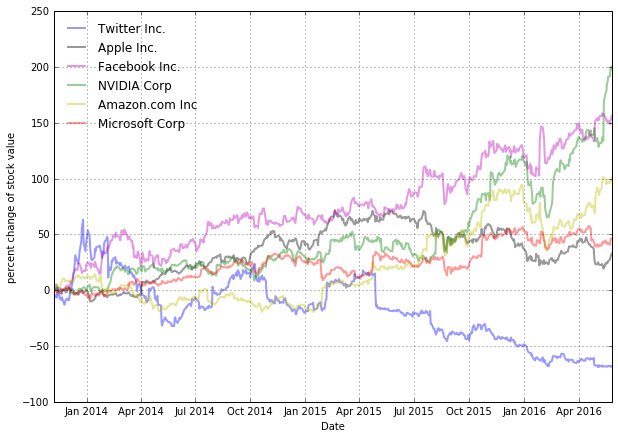

In [15]:
# PLOT with Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
linestyles = ['r-','b-','k-','m-','g-','y-','r-']

data['Date']=pd.to_datetime(data['Date'])
start_date = min(data['Date'])

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(7)
ax = fig.add_subplot(111)

for idx, stock in enumerate(data):
    
    if stock == 'Date':
        continue
    start_value = data.loc[len(data)-1,stock]
    print stock + '    ' + str(start_value)
    perc_change = (data[stock]-start_value)/start_value*100 
    plt.plot(data['Date'],perc_change, linestyles[idx], alpha=0.4, ms = 5, label=stock, linewidth=2)


plt.legend(loc = "upper left",frameon=False)
plt.xlabel('Date')
plt.ylabel('percent change of stock value')
plt.grid(True)


In [18]:
# Bokeh PLOTTING

from bokeh.plotting import figure
from bokeh.charts import TimeSeries
from bokeh.models import Range1d
def stock_plot():

    TOOLS = "pan,wheel_zoom,box_zoom,reset"
    p = figure(x_axis_type="datetime",
                            width=500, height=400, 
                            tools = TOOLS, x_axis_label='x',
                            y_axis_label='y', title = 'stocks')
    LineWidths = 2
    LineAlpha = 0.8
    my_cols = { 'Black': '#3F3F3F',
                'Red':   '#FF0000',
                'Green': '#00DD80',
                'Blue':  '#0000CC',
                'Flieder':'#BB88EE',
                'Rosa': '#EEBBEE',
                'LightBlue':'#77AADD',
                'Orange':'#FF9966'
            }

    for idx, stock in enumerate(data):
    
        if stock == 'Date':
            continue
    
        start_value = data.loc[len(data)-1,stock]
        #print stock + str(start_value)
        perc_change = (data[stock]-start_value)/start_value*100 


        p.line(data['Date'],perc_change, alpha=LineAlpha, color=my_cols.values()[idx],
                    legend=stock, line_width = LineWidths)

    p.set(y_range=Range1d(-100,300)) #, x_range=())
    p.title = "Stock Closing Prices"
    p.grid.grid_line_alpha=0.5
    p.xaxis.axis_label = 'Date'
    p.yaxis.axis_label = '% Change of stock value'
    p.legend.location = "top_left"
    p.legend.label_text_font_size = "9pt"
    p.legend.border_line_color = None
    p.legend.legend_spacing= 1
    p.legend.label_height= 20
    p.legend.label_width= 70
    return p
  

In [19]:
# bokeh plot in the notebook
from bokeh.io import output_notebook, show
output_notebook()
p=stock_plot()
show(p)


Loading BokehJS ...

In [20]:
# bokeh output in new html file
from bokeh.io import output_file, show

In [21]:
output_file("bokehTestplot.html")

In [23]:
p = stock_plot()
show(p)   # save(p) will save without opening a new browser tab